In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Boston_Housing.xlsx')

In [3]:
# Initialize the data as a DataFrame called 'boston'
boston = pd.DataFrame(data)

In [4]:
# See head of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [5]:
# Checking null values for training dataset
boston.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
Unnamed: 14    506
dtype: int64

In [7]:
# Here lets change ‘medv’ column name to ‘Price’
boston.rename(columns={'MEDV':'Price'}, inplace=True)

In [8]:
# Select the target variable 'price'
target_variable = 'Price'
target = boston[target_variable]

In [9]:
#load data ain into pandas. this lib can display talbes nicely
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [10]:
#understand the data
boston.shape

(506, 15)

In [11]:
#check values
boston.min() #minimum values of the features
boston.max() #maximum values of the features
boston.median()#median values of the features
boston.quantile(0.5)  #50 percent quantile of the features

CRIM             0.25651
ZN               0.00000
INDUS            9.69000
CHAS             0.00000
NOX              0.53800
RM               6.20850
AGE             77.50000
DIS              3.20745
RAD              5.00000
TAX            330.00000
PTRATIO         19.05000
B              391.44000
LSTAT           11.36000
Price           21.20000
Unnamed: 14          NaN
Name: 0.5, dtype: float64

In [12]:
boston.nunique()

CRIM           504
ZN              26
INDUS           76
CHAS             2
NOX             81
RM             446
AGE            356
DIS            412
RAD              9
TAX             66
PTRATIO         46
B              357
LSTAT          455
Price          229
Unnamed: 14      0
dtype: int64

In [13]:
boston.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
Price            0
Unnamed: 14    506
dtype: int64

In [14]:
# See rows with missing values
boston[boston.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,NaN


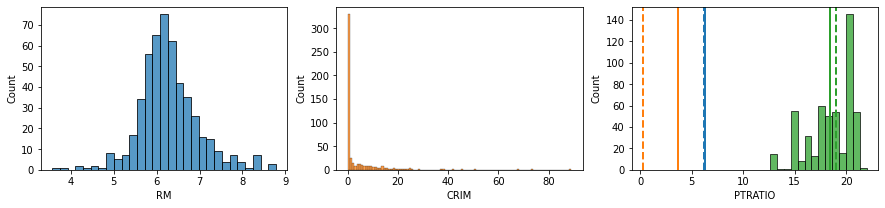

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# create three empty subplots
fig, ax = plt.subplots(ncols=3, figsize=(15, 3))

# select three features and check them
for i, var in enumerate(['RM', 'CRIM', 'PTRATIO']):
    sns.histplot(boston[var], color='C{}'.format(i), ax=ax[i])
    plt.axvline(boston[var].mean(), color='C{}'.format(i), linestyle='solid', linewidth=2)
    plt.axvline(boston[var].median(), color='C{}'.format(i), linestyle='dashed', linewidth=2)

plt.show()


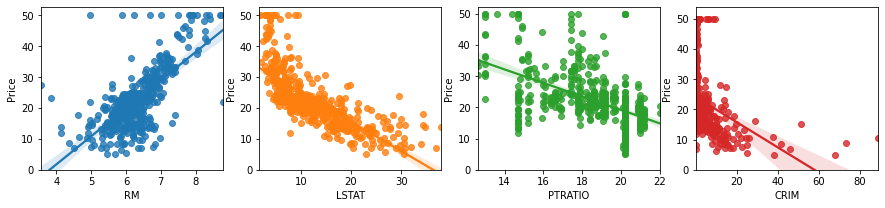

In [18]:
fig, axs = plt.subplots(ncols=4, figsize=(15,3))

for i, var in enumerate(['RM', 'LSTAT', 'PTRATIO','CRIM']):
    sns.regplot(x=var, y='Price', data=boston, color=sns.color_palette()[i], ax=axs[i])
    axs[i].set_ylim(bottom=0)
    
plt.show()

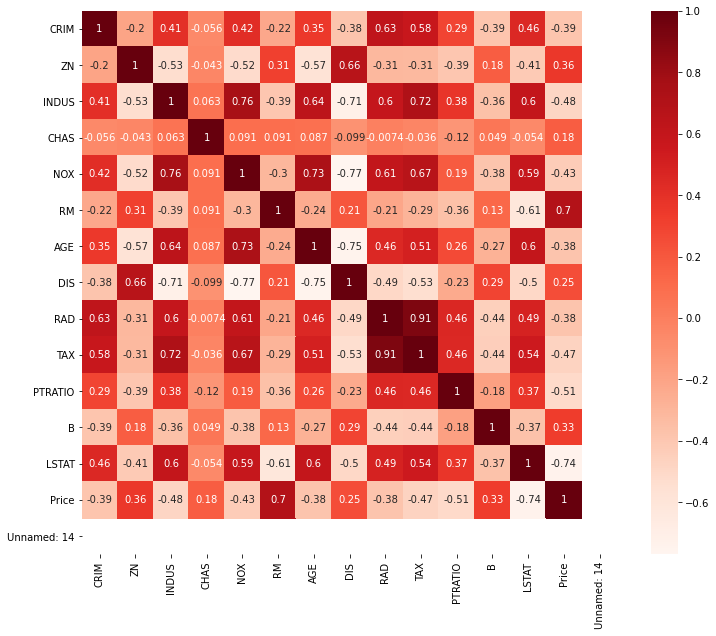

In [19]:
# Calculate the correlation matrix
corr_matrix = boston.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  Price        506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [21]:
boston = boston.drop('Unnamed: 14', axis=1)

In [22]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


<AxesSubplot:>

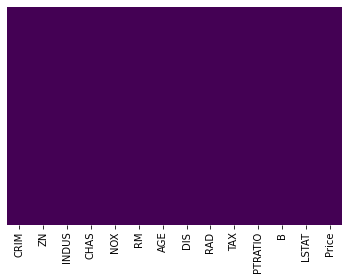

In [24]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(boston.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
#Note: There are no null or missing values here.

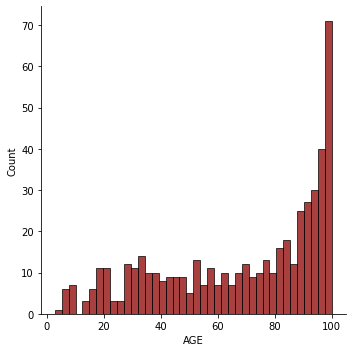

In [30]:
#House’s age feature understanding
sns.displot(boston['AGE'].dropna(),kde=False,color='darkred',bins=40)

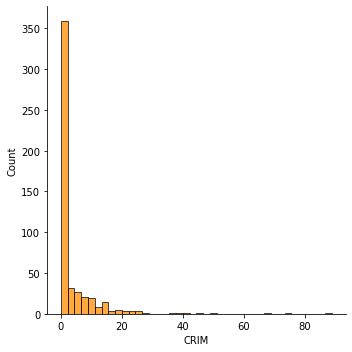

In [32]:
#Crim Rate
sns.displot(boston['CRIM'].dropna(),kde=False,color='darkorange',bins=40)

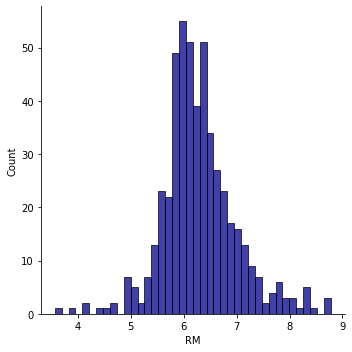

In [35]:
#Understanding Number of Rooms into the house
sns.displot(boston['RM'].dropna(),kde=False,color='darkblue',bins=40)

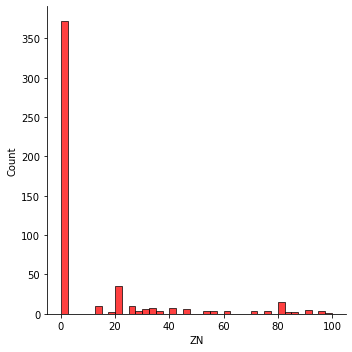

In [36]:
#Understanding Number of Rooms into the house
sns.displot(boston['ZN'].dropna(),kde=False,color='red',bins=40)

In [39]:
#Feature Selection

In [40]:
#Feature Selection is the process where you automatically or manually
#select those features which contribute most to your prediction variable or output
#in which you are interested in. Having irrelevant features in your data can decrease
#the accuracy of the models and make your model learn based on irrelevant features.

In [41]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = boston.iloc[:,0:13] #independent columns
y = boston.iloc[:,-1] #target column i.e price range

In [42]:
# If we want to identify the best features for the target variables. 
#We should make sure that the target variable should be int Values. 
#That’s why I convert into the int value from the floating point value

In [44]:
y = np.round(boston['Price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
bostonscores = pd.DataFrame(fit.scores_)
bostoncolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([bostoncolumns,bostonscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [45]:
#All the Features of the Dataset

In [47]:
print(featureScores.nlargest(5,'Score')) #print 5 best features

   Specs         Score
9    TAX  14817.836927
1     ZN   5937.859414
0   CRIM   5503.817133
11     B   3340.486412
6    AGE   2424.308937


In [48]:
#Feature Importance

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [50]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11565647 0.02414911 0.03925882 0.01469142 0.06804199 0.13788952
 0.12016761 0.10885103 0.03474541 0.04252501 0.04334631 0.10993618
 0.14074112]


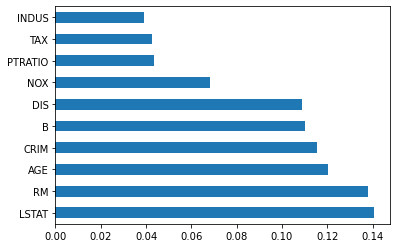

In [52]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [38]:
####################################################Linear regression #########################################################
#Training the model

In [54]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [55]:
#Training the model

In [56]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# Value of y intercept
lm.intercept_

36.40939570713323

In [58]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.126429
1,ZN,0.055614
2,INDUS,-0.014716
3,CHAS,4.790865
4,NOX,-13.80402
5,RM,3.228376
6,AGE,-0.002879
7,DIS,-1.541529
8,RAD,0.325023
9,TAX,-0.013875


In [59]:
#Model Evaluation


In [60]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [61]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7471858471784459
Adjusted R^2: 0.7375194236882101
MAE: 3.105078021606254
MSE: 19.08748064250654
RMSE: 4.368922137382004


In [62]:
#𝑅^2 : It is a measure of the linear relationship between X and Y.
#It is interpreted as the proportion of the variance in the dependent
#variable that is predictable from the independent variable.


#Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression
#models that contain different numbers of predictors.

#MAE : It is the mean of the absolute value of the errors.
#It measures the difference between two continuous variables, here actual and predicted values of y. 
    
#MSE: The mean square error (MSE) is just like the MAE, 
#but squares the difference before summing them all instead of using the absolute value. 

#RMSE: The mean square error (MSE) is just like the MAE,
#but squares the difference before summing them all instead of using the absolute value. 



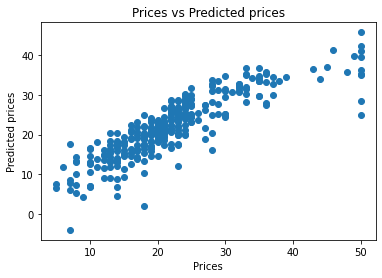

In [63]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

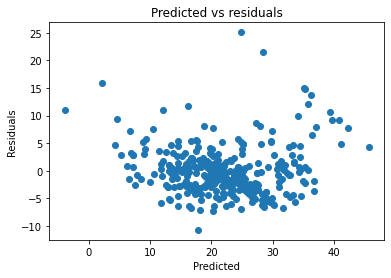

In [64]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [65]:
#There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

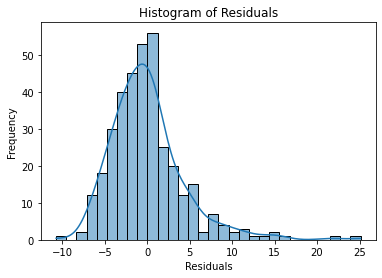

In [66]:
sns.histplot(y_train-y_pred, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [67]:
#Here the residuals are normally distributed. So normality assumption is satisfied

In [68]:
#For test data

In [69]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [70]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7078542986124484
Adjusted R^2: 0.6803333267426066
MAE: 3.8950614311618974
MSE: 30.582586895235266
RMSE: 5.530152520069882


In [71]:
#Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

In [72]:
############################################ Random Forest Regressor ##########################################################

In [73]:
#Train the model

In [74]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
#Model evaluation

In [77]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [78]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9789907866984084
Adjusted R^2: 0.9781874932486417
MAE: 0.8415254237288134
MSE: 1.5861966101694915
RMSE: 1.259442976148381


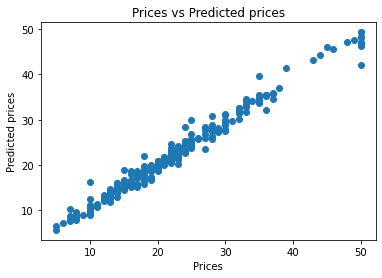

In [79]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

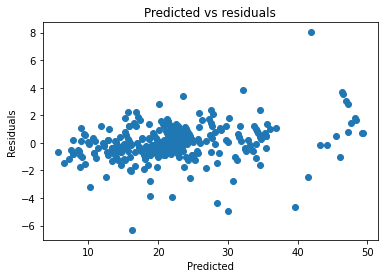

In [80]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [81]:
#For test data

In [82]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [83]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8268974863019249
Adjusted R^2: 0.8105907277651497
MAE: 2.516184210526316
MSE: 18.120830263157895
RMSE: 4.256856852556578


In [87]:
################################################## SVM Regressor ##########################################################

In [89]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [91]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

In [92]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [93]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6484894889652657
Adjusted R^2: 0.6350493811904082
MAE: 2.914236454719486
MSE: 26.53906041308083
RMSE: 5.151607556198437


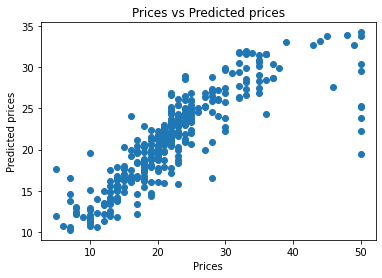

In [94]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

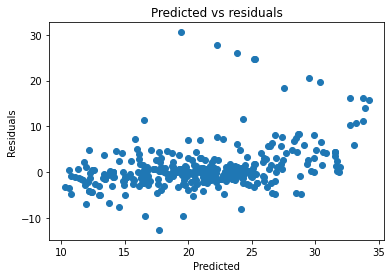

In [95]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [96]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [97]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5949729648542412
Adjusted R^2: 0.5568182441521046
MAE: 3.7851534678317456
MSE: 42.39930431436593
RMSE: 6.511474818684776


In [98]:
################################################## XGBoost Regressor ##########################################################

In [99]:
from xgboost import XGBRegressor

# Create an instance of XGBRegressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

In [100]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [101]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999973487226392
Adjusted R^2: 0.9999972473502695
MAE: 0.00961113784272792
MSE: 0.00020017156768162905
RMSE: 0.01414820015696799


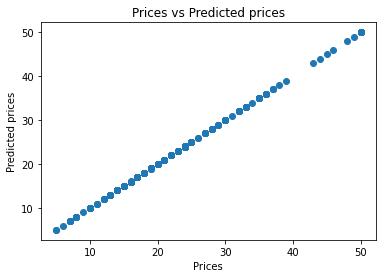

In [102]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

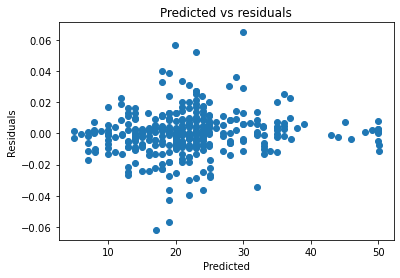

In [103]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [104]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [105]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8546592869619098
Adjusted R^2: 0.8409677705162927
MAE: 2.500244068472009
MSE: 15.214651335931805
RMSE: 3.9005962795362206


In [106]:
#Evaluation and comparision of all the models

In [107]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,85.465929
1,Random Forest,82.689749
0,Linear Regression,70.785430
3,Support Vector Machines,59.497296
